# Importing Libraries

In [1]:
%%time
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.special import erfc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

Wall time: 1.43 s


In [2]:
os.chdir(r"D:\Data Science\Datasets\Satandar  Customer Transaction")

### Importing the data

In [3]:
%%time
# Importing train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Wall time: 13.7 s


# Train

In [4]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train.shape

(200000, 202)

<br>
-> There are 200,000 observations
<br>
-> There are 202 columns
<br>
<br>

In [6]:
# Summary of the train dataset
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
# Data types of each columns in train dataset
pd.DataFrame(train.dtypes).transpose()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


<br>
-> There are 200 columns with float datatype
<br>
-> There is one column with int datatype i.e "target" column
<br>
-> There is one column with object datatype i.e "ID_code" with string values
<br>
<br>

# Test

In [9]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
test.shape

(200000, 201)

<br>
-> There are 200,000 observations
<br>
-> There are 201 columns
<br>
<br>

In [11]:
# Summary of train dataset
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [12]:
# Data types of each columns in test dataset
pd.DataFrame(test.dtypes).transpose()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


<br>
-> There are 200 columns with float datatype
<br>
-> There is one column with object datatype i.e "ID_code" with string values
<br>
<br>

In [14]:
# Lets explore target variable
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

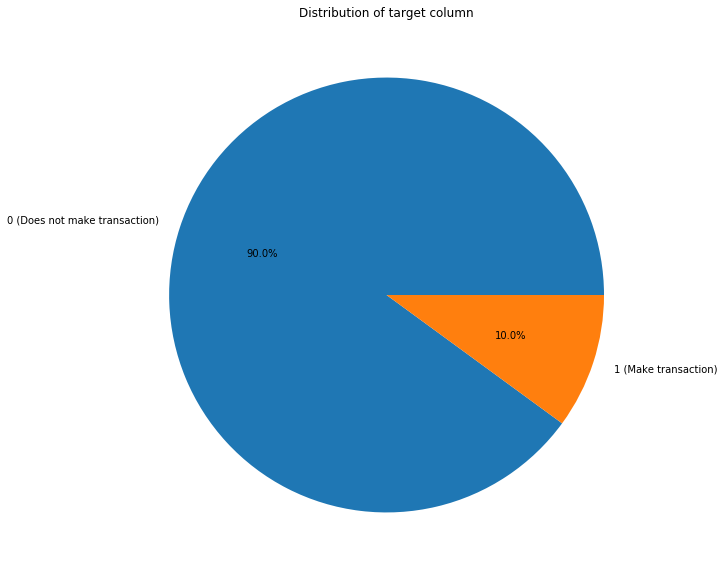

In [15]:
plt.figure(figsize=(10,10))
plt.title("Distribution of target column")
plt.pie([179902,20098], labels = ["0 (Does not make transaction)", "1 (Make transaction)"],autopct='%1.1f%%')
plt.savefig("pie.png")
plt.show()


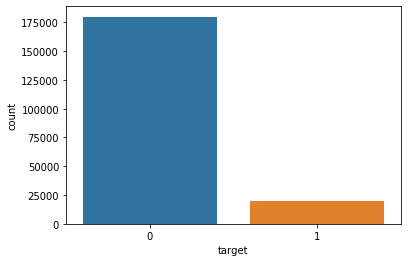

In [16]:
sns.countplot(x='target', data=train)

<br>
<br>
We have to identify which customers will make transaction in the future.
<br>
-> 0 means the customer will not make transaction in the future
<br>
-> 1 means the customer will make transaction in the future
<br>
<br>
In our train dataset out of 200,000 customers
<br>
-> 179,902 customers did not make any transaction
<br>
-> 20,098 customers did make transaction
<br>
<br>

In [17]:
# Checking datatype of target column
train.target.dtype

dtype('int64')

<br>
>> target columns is in int64 datatype. But we know that '1' means customers will make transaction and if not then '0'
<br>
<br>
>> Therefore, the target columns should be categorical. Let's convert target column to categorical
<br>
<br>

In [18]:
# Converting target column from numeric to categorical
train['target'] = train['target'].astype('category')

# Missing Value Analysis

In [ ]:
# Checking for missing values in train dataset
missing_val = pd.DataFrame(train.isna().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {"index":"Variables",0:'Sum'})
missing_val['Percentage'] = (missing_val['Sum']/train.shape[0]) * 100
missing_val = missing_val.reset_index(drop=True)
missing_val = missing_val.transpose()
missing_val

In [ ]:
train.isnull().values.any()

There are no missing values in the train dataset

In [ ]:
# Checking for missing values in test dataset
missing_val = pd.DataFrame(test.isna().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {"index":"Variables",0:'Sum'})
missing_val['Percentage'] = (missing_val['Sum']/test.shape[0]) * 100
missing_val = missing_val.reset_index(drop=True)
missing_val = missing_val.transpose()
missing_val

In [ ]:
test.isnull().values.any()

There are no missing values in the test dataset

# EDA

In [ ]:
# Lets explore target variable
train.target.value_counts()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribution of target column")
plt.pie([179902,20098], labels = ["0 (Does not make transaction)", "1 (Make transaction)"],autopct='%1.1f%%')
plt.savefig("pie.png")
plt.show()


In [ ]:
sns.countplot(x='target', data=train)

<br>
<br>
We have to identify which customers will make transaction in the future.
<br>
-> 0 means the customer will not make transaction in the future
<br>
-> 1 means the customer will make transaction in the future
<br>
<br>
In our train dataset out of 200,000 customers
<br>
-> 179,902 customers did not make any transaction
<br>
-> 20,098 customers did make transaction
<br>
<br>

In [6]:
numerical_features = train.columns[2:]

In [ ]:
#hisograms are used to check distribution of data 
#draw histograms of numeric data in training set 
print("Distribution of Columns")
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    plt.hist(train[col])
    plt.title(col)
plt.savefig("dist.png")

#### Almost all feature follow normalised distribution

In [ ]:
print("Distribution of columns per target class")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[train['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train[train['target']==1][col],hist=False,label='1',color='red')
    
plt.savefig("coltar.png")

#### Train

In [ ]:
# Distribution of mean values per row in the TRAIN dataset
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean per row in the train dataset")
sns.distplot(train[features].mean(axis=1),color="blue", kde=True,bins=120, label='train')
plt.legend()
plt.show()

In [ ]:
# Distribution of mean per columns in TRAIN dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of mean per column in the train dataset")
sns.distplot(train[features].mean(axis=0),color="blue",kde=True,bins=120, label='train')
plt.legend()
plt.show()

In [ ]:
# Distribution of standard deviation of per row for TRAIN dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation per row in the train dataset")
sns.distplot(train[features].std(axis=1),color="blue", kde=True,bins=120, label='train')
plt.legend()
plt.show()

In [ ]:
# Distribution of standard deviation per columns in the TRAIN dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation per column in the train dataset")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
#sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#### Test

In [ ]:
# Distribution of mean values per row in the TRAIN dataset
plt.figure(figsize=(16,6))
features = test.columns.values[1:202]
plt.title("Distribution of mean per row in the test dataset")
sns.distplot(test[features].mean(axis=1),color="red", kde=True,bins=120, label='train')
plt.legend()
plt.show()

In [ ]:
# Distribution of mean per columns in TEST dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the test dataset")
sns.distplot(test[features].mean(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# Distribution of standard deviation of per row for TEST dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation per row in the test dataset")
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
# Distribution of standard deviation per columns in the TEST dataset
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation per column in the test dataset")
sns.distplot(test[features].std(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Feature Scaling

In [19]:
train_features = train.drop(columns=["ID_code","target"], axis=1)
numeric_features = train_features.columns
target = train.target

test_features = test.drop(columns=["ID_code"], axis=1)

In [20]:
train_scaled = pd.DataFrame(StandardScaler().fit_transform(train_features), columns = train_features.columns)
test_scaled = pd.DataFrame(StandardScaler().fit_transform(test_features), columns = test_features.columns)


In [21]:
train_features_scaled = train_scaled.copy()
test_features_scaled = test_scaled.copy()
train_scaled['target'] = train.target

# Feature Selection

In [ ]:
# Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(train_features_scaled.corr())
plt.show()

### PCA 

In [14]:
pca = PCA()
a = pca.fit_transform(train_features_scaled)
b = pca.fit_transform(test_features_scaled)


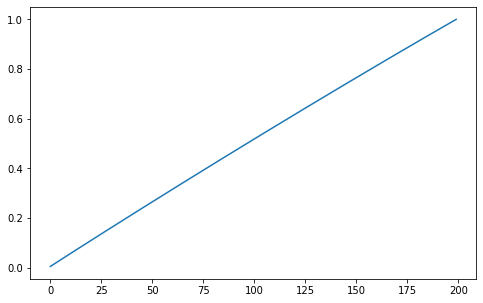

In [15]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(np.arange(200), np.cumsum(explained_variance))
plt.show()

# Model Building

In [ ]:
len(target), len(train_features_scaled)

In [22]:
#x = train_features_scaled[feature_name]
x = train_features_scaled
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

## Logistic Regression

In [17]:
lr_model = LogisticRegression().fit(x_train, y_train)
lr_prediciton = lr_model.predict(x_test)
lr_prediciton

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Decision Tree

In [18]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_prediciton = dt_model.predict(x_test)
dt_prediciton

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Random Forest

In [23]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
rf_prediciton = rf_model.predict(x_test)
rf_prediciton

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# LightGBM

In [ ]:
len(y_train)

In [23]:
T=200000
P=20098
scale_pos_weight = T/P - 1

scale_pos_weight
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 1
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1
params['scale_pos_weight']=scale_pos_weight

In [24]:
trn_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)

In [25]:
%%time
#using light gbm before feature engineeering 
num_round = 2000
lgbm_model = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=50, early_stopping_rounds = 1000)

ValueError: Series.dtypes must be int, float or bool

In [ ]:

lgbm_prediction = lgbm_model.predict(x_test, num_iteration=lgbm_model.best_iteration)
print("CV score before adding features for standard parameters: {:<.5f}".format(roc_auc_score(y_test, lgbm_prediction)))

In [ ]:
lgbm_prediction = np.where(lgbm_prediction > 0.5, 1,0)
lgbm_prediction

In [20]:
def model_eval_metric(y_test, pred):
    auc = roc_auc_score(y_test, pred)
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1_score = 2 * (precision * recall) / (precision + recall)

    
    return auc,acc, precision, recall, f1_score

In [21]:
eval_metric=[]
ml_algo = ["Logistic Regression", "Decision Tree", "Random Forest", "LightGBM"]
ml_model = [lr_model, dt_model, rf_model, , lgbm_model]
predictions = [lr_prediciton, dt_prediciton, rf_prediciton, lgbm_prediction]


i = 0
for mod in ml_algo:
    auc,acc,precision,recall,f1_score = model_eval_metric(y_test, predictions[i])
    eval_metric.append([mod,auc,acc,precision,recall,f1_score])
    i=i+1
model_performance=pd.DataFrame(eval_metric, columns=["Model","AUC", "Accuracy", "Precision", "Recall", "f1_score"])

In [22]:
model_performance

,Model,AUC,Accuracy,Precision,Recall,f1_score
0,Logistic,0.630654,0.914433,0.684384,0.275502,0.392857
1,DT,0.556530,0.835683,0.197377,0.207165,0.202153


From above dataframe we can clearly see LightGBM has higher AUC value. So i will LightGBM to predict on test dataset

#### Performing feature engineering and modelling again with lightgbm

In [ ]:
df_test = test_features_scaled.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in range(df_test.shape[1]):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print('Found',len(real_samples_indexes),'real test')
print('Found',len(synthetic_samples_indexes),'fake test')

In [ ]:
#adding features
# FREQUENCY ENCODE
def encode_FE(df,col,test):
    cv = df[col].value_counts()
    nm = "freq_"+col
    df[nm] = df[col].map(cv)
    test[nm] = test[col].map(cv)
    test[nm].fillna(0,inplace=True)
    if cv.max()<=255:
        df[nm] = df[nm].astype('uint8')
        test[nm] = test[nm].astype('uint8')
    else:
        df[nm] = df[nm].astype('uint16')
        test[nm] = test[nm].astype('uint16')        
    return

test_features_scaled['target'] = -1
comb = pd.concat([train_scaled,test_features_scaled.loc[real_samples_indexes]],axis=0,sort=True)
for i in range(200): encode_FE(comb,'var_'+str(i),test_features_scaled)
train_fe = comb[:len(train)]; del comb
print('Added 200 new magic features!')

In [ ]:
train_fe.shape, test_features_scaled.shape

In [ ]:

#adding features
for df in [train_fe,test_features_scaled]:
    df['sum'] = df[numeric_features].sum(axis=1)  
    df['min'] = df[numeric_features].min(axis=1)
    df['max'] = df[numeric_features].max(axis=1)
    df['mean'] = df[numeric_features].mean(axis=1)
    df['std'] = df[numeric_features].std(axis=1)
    df['skew'] = df[numeric_features].skew(axis=1)
    df['kurt'] = df[numeric_features].kurtosis(axis=1)
    df['med'] = df[numeric_features].median(axis=1)

In [ ]:
y_ = train_fe['target']
x_ = train_fe.drop(['target'], axis=1)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_, y_, stratify = y_, random_state=1, test_size=0.3)

In [ ]:
trn_data = lgb.Dataset(x1_train, label=y1_train)
val_data = lgb.Dataset(x1_test, label=y1_test)

In [ ]:
num_round =2000
clf2 = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=50, early_stopping_rounds = 1000)

In [ ]:
y_pred2= clf2.predict(x1_test, num_iteration=clf2.best_iteration)
print("CV score after adding features for standard parameters: {:<.5f}".format(roc_auc_score(y1_test, y_pred2)))

In [ ]:
params1 = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 8,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "scale_pos_weight":scale_pos_weight
}

In [ ]:
features = [c for c in train_fe.columns if c not in ['target']]
target = train['target']

In [ ]:
train_fe = train_fe.drop(columns="target")
train_fe["target"] = train["target"]

In [ ]:
df_train=train_fe
df_test=test_features_scaled.iloc[real_samples_indexes,:]

In [ ]:
#using stratified kfold technique with tuned parameters
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 3000
    clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

In [ ]:
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

In [ ]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [ ]:
auc=roc_auc_score(target, oof)

In [ ]:
fpr,tpr,thresholds=roc_curve(target,oof)

In [ ]:
aa=pd.DataFrame()
aa['fpr']=fpr
aa['tpr']=tpr
aa['thresholds']=thresholds

In [ ]:
mmscale = MinMaxScaler()  
aa = mmscale.fit_transform(aa)
aa=pd.DataFrame(aa)

In [ ]:
plt.figure()
plt.plot(aa[0],aa[1],label='ROC curve (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RECIEVER OPERATING CHARACTERSTIC")
plt.legend(loc="lower right")

ax2=plt.gca().twinx()
ax2.plot(aa[0],aa[2],markeredgecolor='red',linestyle="dashed",color="red")
ax2.set_ylabel('Threshold',color="red")
ax2.set_ylim([min(aa[2]),max(aa[2])])
ax2.set_xlim([min(aa[0]),max(aa[0])])
plt.savefig("roc_and_threshold.png")
plt.show()
plt.close()

In [ ]:
lgb_pred2 = np.zeros(len(oof))

In [ ]:
for i in range(0,len(oof)):
    if oof[i]>=.5:     
       lgb_pred2[i]=1
    else:  
       lgb_pred2[i]=0

In [ ]:
lgb_acu = accuracy_score(target,lgb_pred2)
lgb_pre = precision_score(lgb_pred2, target)
lgb_rec = recall_score(lgb_pred2,target)
lgb_auc = auc
lgb_f1 = 2 * (lgb_pre * lgb_rec) / (lgb_pre + lgb_rec)

print("Accuracy Score for LightGBM is ",lgb_acu)
print("Precision Score for  LightGBM is ",lgb_pre)
print("Recall Score for LightGBM is ",lgb_rec)
print("AUC Score for LightGBM is ", lgb_auc)
print("f1 Score for LightGBM is ",lgb_f1)

In [ ]:
test['target'] = lgb_pred2.astype('int')
test.head(10)

In [ ]:
#test.to_csv("predicted_test.csv")